Let's install PyTorch and fastai libraries first. You have to repeat this step every time you restart this notebook in colab.

In [1]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
     |████████████████████████████████| 704.8MB 23kB/s 


In [0]:
# import libraries
import fastai
from fastai import *
from fastai.text import * 
import pandas as pd
import numpy as np
from functools import partial
import io
import os

In [4]:
#import dataset
from google.colab import files
uploaded = files.upload()

#from sklearn.datasets import fetch_20newsgroups
#dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
#documents = dataset.data

Saving train50.csv to train50.csv


In [71]:
f = open("train50.csv", encoding ="utf-8" )
df = pd.read_csv(f, sep='","', header=0,names=['label','title','text'])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [0]:
# create a dataframe
df = pd.DataFrame({'label':df.label,
                   'text':df.title+df.text})

In [73]:
df.shape

(49, 2)

In [69]:
#df = df[df['label'].isin([1,2,3,4])]
df = df.reset_index(drop = True)
df.shape

(0, 2)

In [74]:
df['label'].value_counts()

"1"    15
"4"    12
"2"    12
"3"    10
Name: label, dtype: int64

### Preprocessing

In [0]:
df['text'] = df['text'].str.replace("[^a-zA-Z]", " ")

In [76]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from nltk.corpus import stopwords 
stop_words = stopwords.words('english') 

In [0]:
# tokenization 
tokenized_doc = df['text'].apply(lambda x: x.split())

# remove stop-words 
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words]) 

# de-tokenization 
detokenized_doc = [] 
for i in range(len(df)): 
    t = ' '.join(tokenized_doc[i]) 
    detokenized_doc.append(t) 
df['text'] = detokenized_doc

In [0]:
from sklearn.model_selection import train_test_split

# split data into training and validation set
df_trn, df_val = train_test_split(df, stratify = df['label'], test_size = 0.4, random_state = 12)

In [80]:
df_trn.shape, df_val.shape

((29, 2), (20, 2))

### Data Preparation

In [92]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "")

# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df_trn, valid_df = df_val, vocab=data_lm.train_ds.vocab, bs=8)

In [0]:
learn = language_model_learner(data_lm,  arch = AWD_LSTM, pretrained = True, drop_mult=0.7)

In [94]:
# train the learner object
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.039039,1.993144,0.619866,00:00


In [85]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


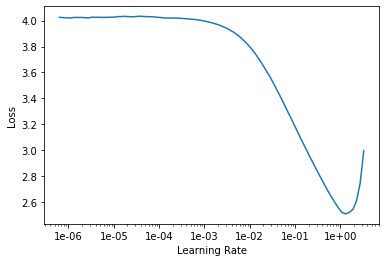

In [86]:
learn.recorder.plot()

In [0]:
learn.save_encoder('ft_enc')

In [96]:
learn = text_classifier_learner(data_clas, arch = AWD_LSTM,drop_mult=0.7) 
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (29 items)
x: TextList
xxbos xxmaj halliburton xxmaj xxunk xxmaj xxunk xxmaj time xxmaj xxunk xxmaj costs xxmaj the u s xxmaj xxunk xxunk xxmaj halliburton third xxunk xxunk costs xxmaj iraq xxmaj xxunk,xxbos xxmaj xxunk xxmaj xxunk xxmaj delay xxmaj xxunk xxmaj pension xxmaj payments xxmaj in xxunk xxunk cash xxunk xxunk xxup us xxmaj xxunk xxmaj xxunk xxmaj inc said xxmaj monday plans xxunk xxmaj internal xxmaj xxunk xxmaj service xxunk delay payments pension plans two xxunk xxunk,xxbos xxmaj nikkei xxmaj rises xxmaj midday xxmaj reuters xxmaj reuters xxmaj gains banks exporters helped lift xxmaj tokyo xxmaj nikkei average percent midday xxmaj tuesday fall crude oil prices rebound u s stocks led buyers pick shares hit index recent sharp losses,xxbos xxmaj iraqi peace team go xxmaj najaf xxmaj an xxmaj iraqi delegation xxunk xxmaj najaf xxunk end xxunk xxup us led xxunk xxmaj xxunk militants,xxbos xxmaj xxunk xxmaj heyer xxmaj go xx

In [90]:
learn.lr_find()
learn.recorder.plot()

ZeroDivisionError: ignored

In [97]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.587456,1.375225,0.200000,00:00
